# Packages

In [1]:
import zipfile
import os
import glob

import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

import imageio
import cv2

# Mount and Load Dataset

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# open zip file
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/Springboard - Capstone 3/rawData.zip', 'r')

# create folder with raw data
zip_ref.extractall('/content/BloodCellData')
zip_ref.close()

In [4]:
# Train Data Directory
Train_datadir = '../content/BloodCellData/Data/Train'
Test_datadir = '../content/BloodCellData/Data/Test'

print("Train Directory Folders:", os.listdir(Train_datadir))
print("Test Directory Folders:", os.listdir(Test_datadir))

# Cell Type Catagories
cellTypes = ["EOSINOPHIL", "LYMPHOCYTE", "MONOCYTE", "NEUTROPHIL"]

Train Directory Folders: ['LYMPHOCYTE', 'EOSINOPHIL', 'NEUTROPHIL', 'MONOCYTE']
Test Directory Folders: ['LYMPHOCYTE', 'EOSINOPHIL', 'NEUTROPHIL', 'MONOCYTE']


# Collect and Convert Images to Arrays into Lists

## Train Data

In [5]:
# Train Data
img_id = []
img_array = []
img_label = []

# Folders also represent the cell type catagory
for folder in cellTypes:
  dir = os.path.join(Train_datadir, folder)
  for img in os.listdir(dir):
    img_path = os.path.join(dir, img)
    img_arr = cv2.imread(img_path)
    img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
    
    img_id.append(img)
    img_array.append(img_arr)
    img_label.append(folder)

In [6]:
# Check lists contain total amount of training images
print(len(img_id))
print(len(img_array))
print(len(img_label))

9957
9957
9957


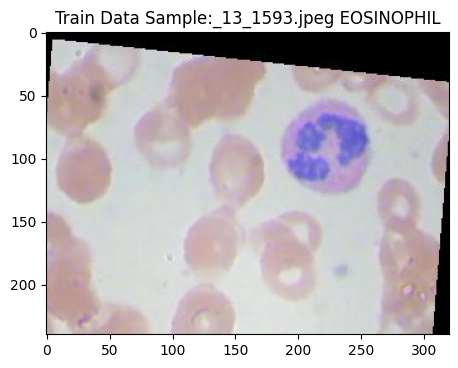

[[[10  6  7]
  [ 3  0  0]
  [ 9  5  6]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 9  5  6]
  [ 3  0  0]
  [ 4  0  1]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 3  0  0]
  [ 4  0  1]
  [ 5  1  2]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]]


In [23]:
# Check image aligns
plt.rcParams['figure.dpi'] = 100

img = 0
plt.imshow(img_array[img], cmap='gray')
plt.grid(False)
plt.title("Train Data Sample:" + img_id[img] + ' ' + img_label[img])
plt.show()

print(img_array[img][:3])

## Test Data

In [8]:
# Test Data
test_img_id = []
test_img_array = []
test_img_label = []

# Folders also represent the cell type catagory
for folder in cellTypes:
  dir = os.path.join(Test_datadir, folder)
  for img in os.listdir(dir):
    img_path = os.path.join(dir, img)
    img_arr = cv2.imread(img_path)
    img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
    
    test_img_id.append(img)
    test_img_array.append(img_arr)
    test_img_label.append(folder)

In [9]:
print(len(test_img_id))
print(len(test_img_array))
print(len(test_img_label))

2487
2487
2487


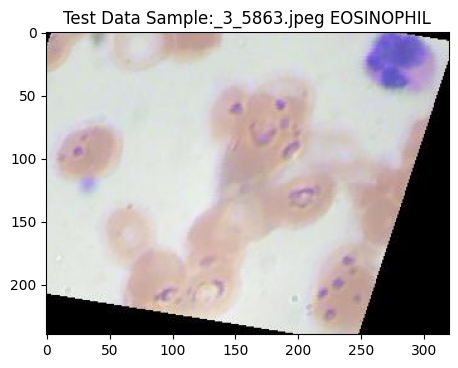

[[[ 1  0  5]
  [ 3  0  4]
  [16  6 14]
  ...
  [ 0  0  0]
  [13 13 11]
  [ 7  7  5]]

 [[21 18 25]
  [ 3  0  4]
  [ 6  0  2]
  ...
  [ 0  0  0]
  [ 4  4  2]
  [ 0  0  0]]

 [[ 3  0  4]
  [17 10 17]
  [28 17 23]
  ...
  [ 0  0  0]
  [ 5  5  3]
  [ 7  8  3]]]


In [22]:
# Check image aligns
plt.rcParams['figure.dpi'] = 100

img = 0
plt.imshow(test_img_array[img], cmap='gray')
plt.grid(False)
plt.title("Test Data Sample:" + test_img_id[img] + ' ' + test_img_label[img])
plt.show()

print(test_img_array[img][:3])

# EDA on Train Data

In [11]:
print("EOSINOPHIL Number of Images:", len(os.listdir('../content/BloodCellData/Data/Train/EOSINOPHIL')))
print("LYMPHOCYTE Number of Images:", len(os.listdir('../content/BloodCellData/Data/Train/LYMPHOCYTE')))
print("MONOCYTE Number of Images:", len(os.listdir('../content/BloodCellData/Data/Train/MONOCYTE')))
print("NEUTROPHIL Number of Images:", len(os.listdir('../content/BloodCellData/Data/Train/NEUTROPHIL')))

EOSINOPHIL Number of Images: 2497
LYMPHOCYTE Number of Images: 2483
MONOCYTE Number of Images: 2478
NEUTROPHIL Number of Images: 2499


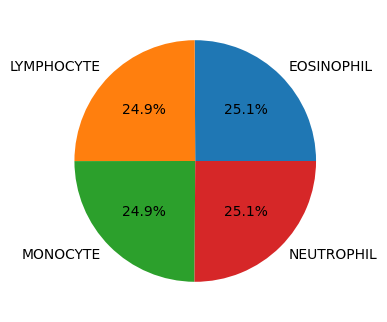

In [12]:
plt.rcParams['figure.dpi'] = 100

image_counts = [2497, 2483, 2478, 2499]
image_cellType = ["EOSINOPHIL", "LYMPHOCYTE", "MONOCYTE", "NEUTROPHIL"]

plt.pie(image_counts, labels=image_cellType, autopct='%1.1f%%')
plt.show()

About equal number of training images for each white blood cell type.

In [13]:
# Selecting the ranges within the img_array list that will group the cell Types together
EOSINOPHIL_imgs = range(0,2497)
LYMPHOCYTE_imgs = range(2497,4980)
MONOCYTE_imgs = range(4980,7458)
NEUTROPHIL_imgs = range(7458,9957)

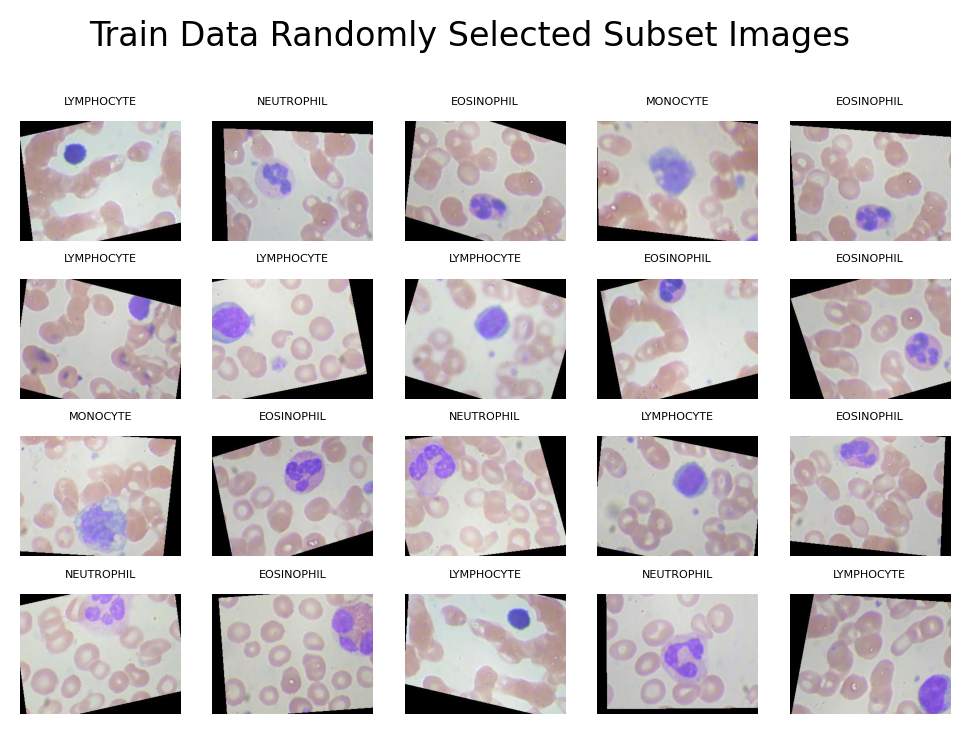

In [25]:
# Tracking the randomly selected images
randimg_list = []

fig, ax = plt.subplots(nrows=4, ncols=5)
plt.rcParams['figure.dpi'] = 200

# Randomly select 20 images from the training data
for i in range(4):
  for j in range(5):
    randimg = random.randint(0, len(img_array))
    randimg_list.append(randimg)
    ax[i,j].imshow(img_array[randimg], cmap='gray')
    ax[i,j].set_title(img_label[randimg], fontsize=4)
    ax[i,j].axis('off')

fig.suptitle("Train Data Randomly Selected Subset Images", y=1)
plt.show()

In [26]:
for randimg in randimg_list:
  print(img_array[randimg].shape)

(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)


All of the images have the same width and height, which will be important to keep when inputting into the model.

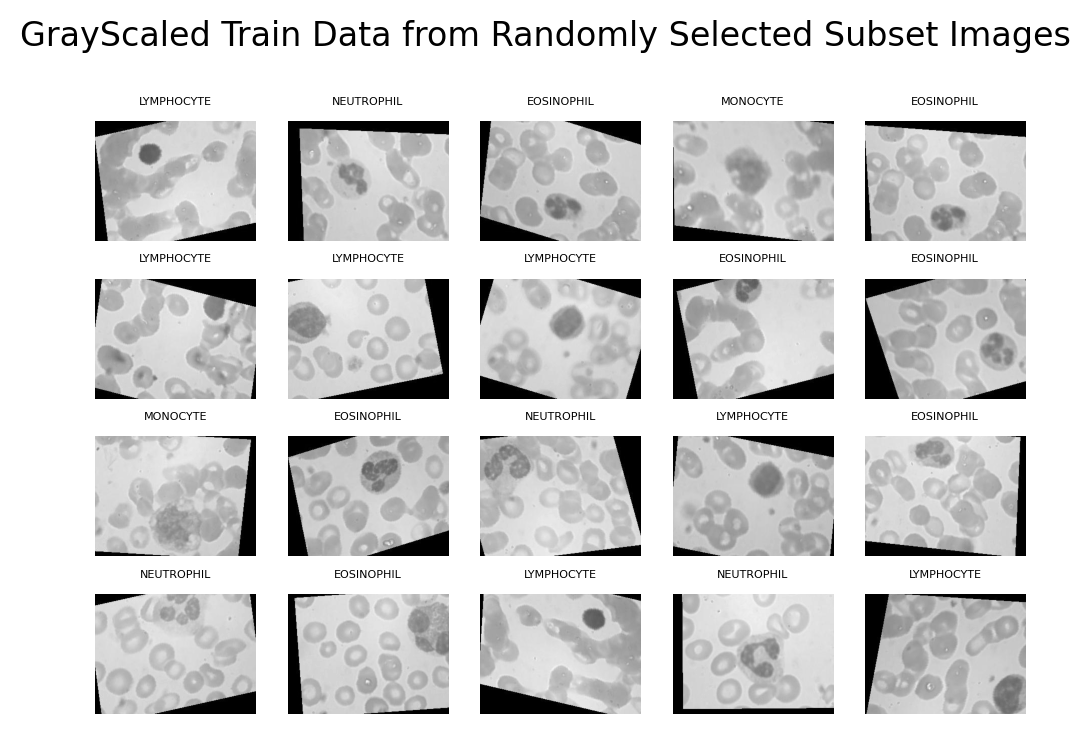

In [30]:
# Exploration using Gray Scale
fig, ax = plt.subplots(nrows=4, ncols=5)

# Tracking for randimg_list
k = 0

# Same 20 random images shown above is converted to gray scale
for i in range(4):
  for j in range(5):
    img = randimg_list[k]
    gray = cv2.cvtColor(img_array[img], cv2.COLOR_RGB2GRAY)
    ax[i,j].imshow(gray, cmap='gray')
    ax[i,j].set_title(img_label[img], fontsize=4)
    ax[i,j].axis('off')

    k = k+1

fig.suptitle("GrayScaled Train Data from Randomly Selected Subset Images", y=1)
plt.show()

The next section of exploration will convert the images to gray scale to have an easier point to compare all images rather than trying to compare using all three color channels. If there are any siginificant differences in the gray scale between the 4 types of cells, then further investigation can be done within the rgb scale.

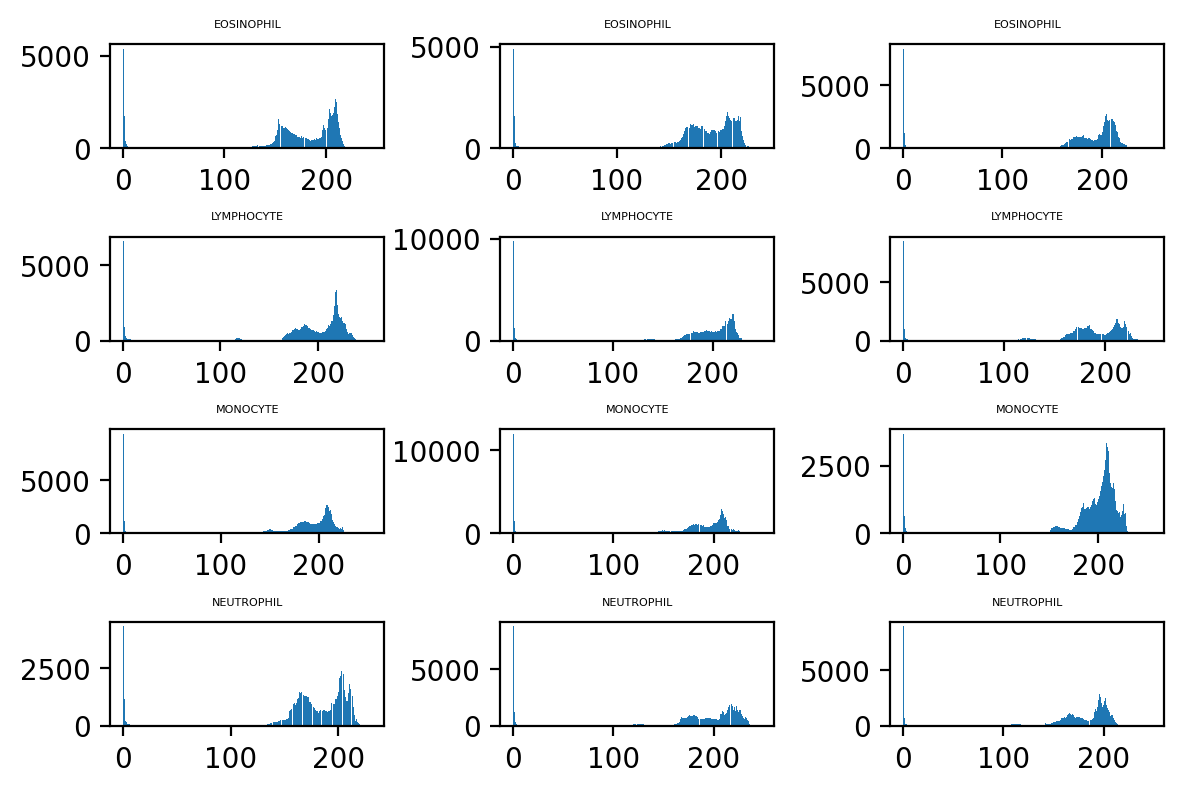

In [28]:
fig, ax = plt.subplots(nrows=4, ncols=3)
plt.tight_layout()

# 3 Random images chosen from each cell type
eso_samples = random.sample(EOSINOPHIL_imgs, 3)
lym_samples = random.sample(LYMPHOCYTE_imgs, 3)
mono_samples = random.sample(MONOCYTE_imgs, 3)
neut_samples = random.sample(NEUTROPHIL_imgs, 3)

sampleList = [eso_samples, lym_samples, mono_samples, neut_samples]

# Histogram plot of the pixels
for i, sample in enumerate(sampleList):
  for j, sampleItem in enumerate(sample):
    gray = cv2.cvtColor(img_array[sampleItem], cv2.COLOR_RGB2GRAY)
    ax[i,j].hist(gray.ravel(), bins=256)
    ax[i,j].set_title(img_label[sampleItem], fontsize=4)

plt.show()

The bin at and around the 0 pixel mark are the black pixels at the border in all of the images due to the data set being an augmentation/rotation of original images. The bins with high counts towards the higher end of the pixel intensity are the important cells to focus on. Somewhere in the middle are the pixels that define the target cell type.

A quick visual comparision shows that there are no distinct features or groups of pixel intensity that defines a specific cell type. Referencing back to the randomly selected images above, this is most likely due to the fact that cells are of varying sizes that are not defined to any one group. Note, the important feature to distinguish cell types as mentioned in the proposal is the shape of the stained granules.

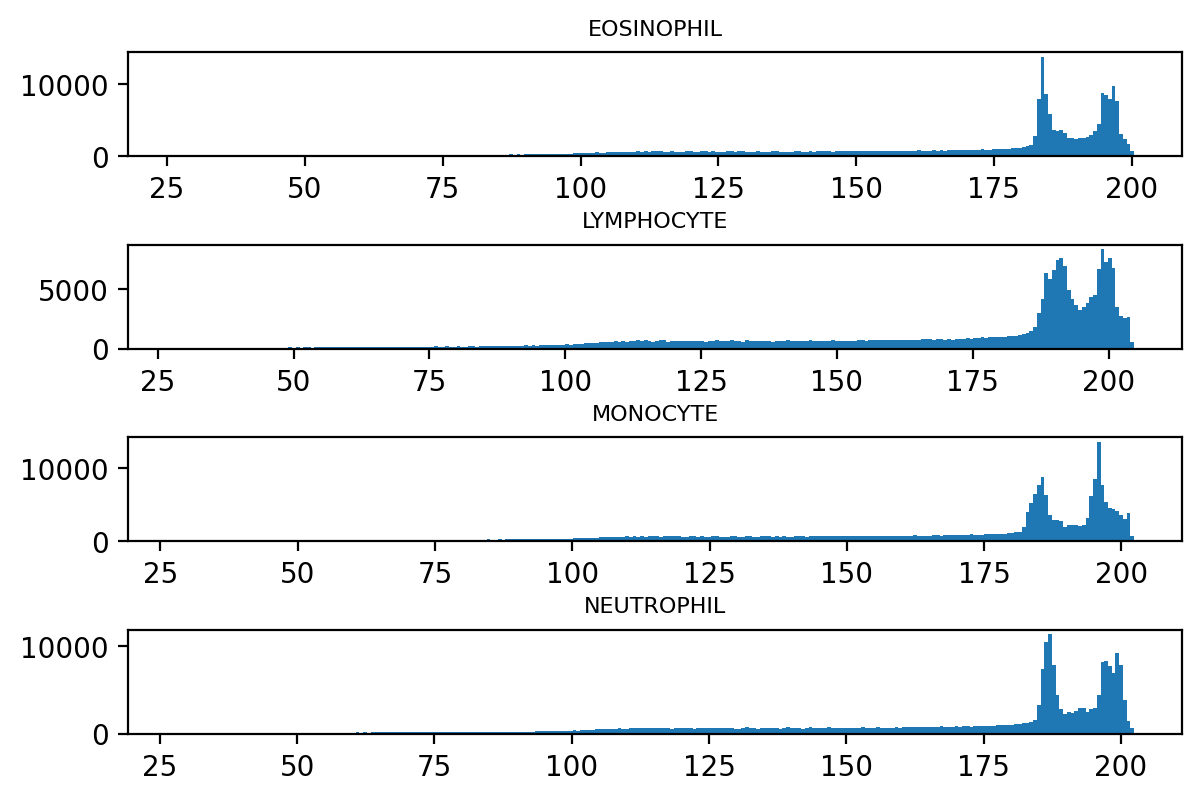

In [18]:
# Combining all of the cell type images together and averaging their pixel counts.

fig, ax = plt.subplots(nrows=4, ncols=1)
plt.tight_layout()

cellImages = [("EOSINOPHIL", EOSINOPHIL_imgs), ("LYMPHOCYTE", LYMPHOCYTE_imgs), ("MONOCYTE", MONOCYTE_imgs), ("NEUTROPHIL", NEUTROPHIL_imgs)]

for i, cellType in enumerate(cellImages):
  cellMin = min(cellType[1])
  cellMax = max(cellType[1])
  averageArray = np.mean(img_array[cellMin:cellMax], axis=0)
  ax[i].hist(averageArray.ravel(), bins=256)
  ax[i].set_title(cellType[0], fontsize=8)

plt.show()

After averaging all of the pixel values for each cell type and plotting them on a histogram, they appear to all have similar shapes. The high 0 pixel bin spike in each individual images shown earlier have been visually eliminated since it was only a small part of the whole picture. What all of the images have in common is the two bi-modal peaks at ~180 and ~200. Thresholding investigation shows that the ~180 are the unstained red blood cells, while the ~200 is the empty spaces between the cells.

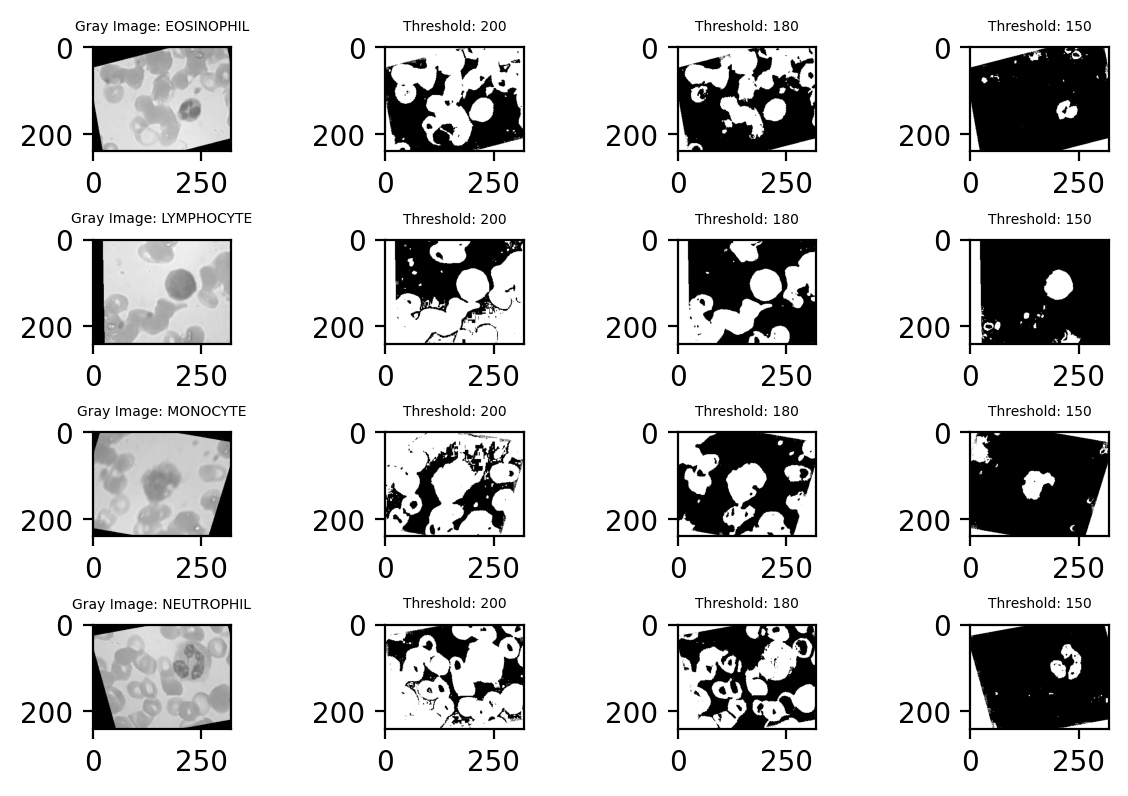

In [55]:
fig, ax = plt.subplots(nrows=4, ncols=4)
plt.tight_layout()

# Arbitrarily chosen image from each cell type
imgs = [1500, 2500, 6000, 7500]
thresh = []

for i in range(4):
  img = imgs[i]
  gray = cv2.cvtColor(img_array[img], cv2.COLOR_RGB2GRAY)

  ax[i,0].imshow(gray, cmap='gray')
  ax[i,0].set_title("Gray Image: " + img_label[img], fontsize=5)

  binary_threshold = gray < 200
  ax[i,1].imshow(binary_threshold, cmap='gray')
  ax[i,1].set_title("Threshold: 200", fontsize=5)

  binary_threshold = gray < 180
  ax[i,2].imshow(binary_threshold, cmap='gray')
  ax[i,2].set_title("Threshold: 180", fontsize=5)

  binary_threshold = gray < 150
  ax[i,3].imshow(binary_threshold, cmap='gray')
  ax[i,3].set_title("Threshold: 150", fontsize=5)

plt.show()

Using an arbitrarily chosen image from each cell type with the thresholding values discovered in the average histograms, a threshold at 200 shows most of the black are the empty spaces that are not either white or red blood cells. As the threshold is decreased to 180, more of the red blood cells become included into black areas. When the threshold is set to 150, mostly everything but the stained white blood cell is colored in black. This means that the important pixel values that is the stain for the white blood cell lie less than 150 pixel values. But also need to remember that the pixel value is greater than 50, to exclude the black out of frame pixels that are due to the picture augmentation.

This thresholding also brings out the defining features of each cell type with:

Eosinophil - having a bi-lobed, sausage-shape.

Lymphocyte - a single large and round shape.

Monocyte - a single large and kidney shape.

Neutrophil - having multi-lobed shapes.

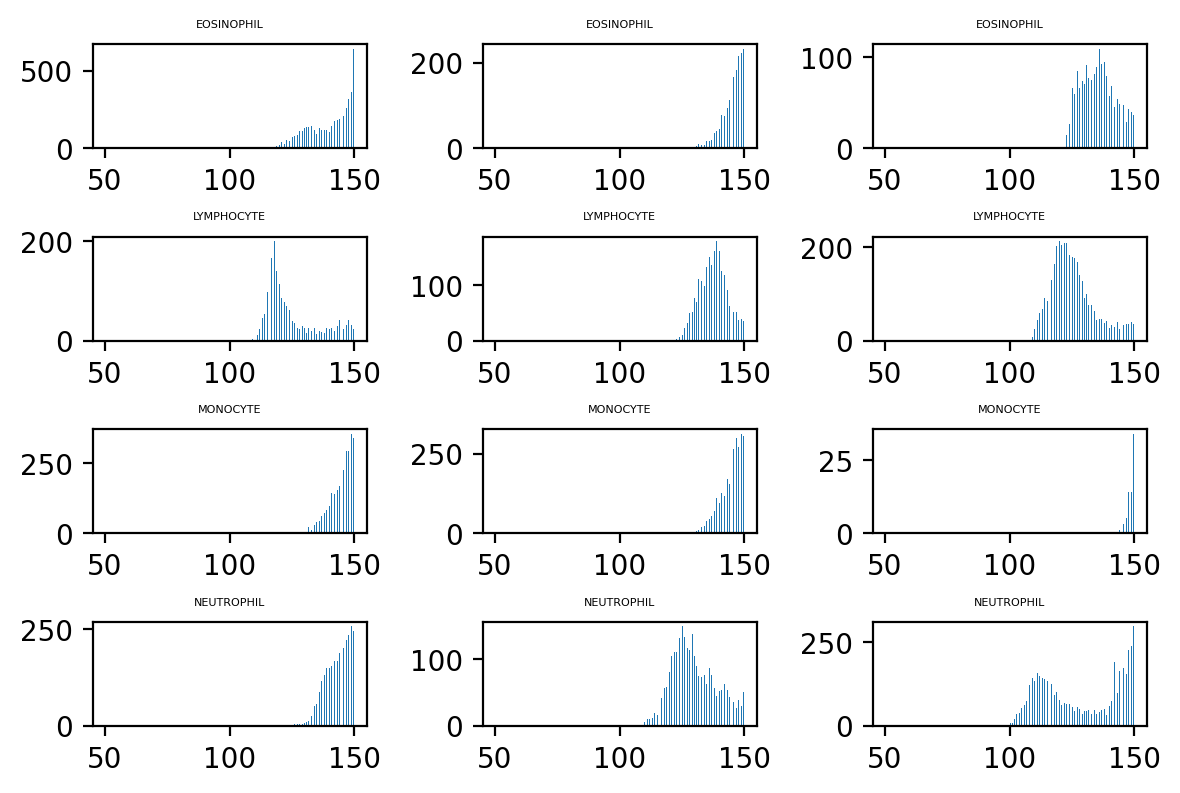

In [42]:
fig, ax = plt.subplots(nrows=4, ncols=3)
plt.tight_layout()

sampleList = [eso_samples, lym_samples, mono_samples, neut_samples]

for i, sample in enumerate(sampleList):
  for j, sampleItem in enumerate(sample):
    gray = cv2.cvtColor(img_array[sampleItem], cv2.COLOR_RGB2GRAY)
    ax[i,j].hist(gray.ravel(), bins=256, range=[50, 150])
    ax[i,j].set_title(img_label[sampleItem], fontsize=4)

plt.show()

Histogram shows the pixel values after thresholding investigation showed that the important stained pixels are between 50 and up to and around ~150.